# 拉普拉斯特征映射(Laplacian Eigenmap, LE)

## 符号定义

|符号|含义|
|:-:|:-:|
|$\bm{x}$|样本点|
|$X_i$|样本点$\bm{x_i}$的k近邻点集合|
|$N$|总样本数|
|$N_i$|样本点$\bm{x_i}$的k近邻点集合的样本总数|
|$\bm{X_i^{(j)}}$|样本点$\bm{x_i}$的k近邻点集合中的第j个样本点|
|$W$|邻接矩阵|
|$\bm{y}$|样本点降维后坐标|

## 概念
LE和LLE类似，均是从“局部”的角度来构建数据与数据之间的联系和区别。不同点在于：LLE认为任意一个数据点均可以由其最近邻的k个点线性表示，并且这种线性表示在降维后依然成立；LE认为任意一个数据点和其最近邻的k个点在降维后也应当尽可能相近，即在降维后尽可能保证数据间的结构不发生改变。

显然，LLE的优化目标和LE的优化目标不同。

对于LLE来说，降维前后数据点之间的距离变化并不是很重要，只需要降维后依然能够满足降维前的局部线性关系即可。在实际例子中会发现，降维后，某些数据点的k个最近邻点发生了变化（数据之间的结构发生了变化），但是该数据点依然可以由变换前的k个最近邻点的降维结果以相同的权重线性组合得到。

对于LE来说，降维前后数据点之间的线性关系是否保持并不是很重要，只要降维后相近的数据点依然尽可能相近即可。即降维前后，任意数据点的k个最近邻点不会发生变化。

上述分析暗示了LE的核心步骤：

1. 在高维空间中对数据间的结构进行描述
2. 在低维空间中寻找满足这一结构的集合

对于第一步，LE希望关系的描述有如下特点：
* 数据点A和数据点B关系的描述是唯一的。即无论是从数据点A出发对AB关系进行描述还是从数据点B出发对AB关系进行描述均是相同的（无向图）。
* 对关系的描述是局部的。即仅描述数据点A与其周围最为接近的数个数据点之间的关系，不会考虑数据点A与所有数据点之间的关系。

若将关系表示为邻接矩阵，则上述的第一条要求使得邻接矩阵为对称矩阵，上述的第二条要求使得关系矩阵为稀疏矩阵。

对于第二步，实际上就是解决一个优化问题。其优化目标就是：找到一个集合，使得集合中的元素与高维空间中的数据点一一对应，并且这些元素之间的空间关系与高维空间中数据点之间的关系尽可能相似。

## 推导

### 高维空间中的邻接矩阵

k近邻能很方便的找到任意数据点k个最近邻的数据点，这些最近邻的点即为空间中与当前数据点最为接近的数据点的集合。因此用k近邻对定义两个数据点之间是否存在关系是非常合适的。

但是k近邻存在一个明显的漏洞： **若数据点A是数据点B的最近邻点，那么数据点B不一定是数据点A的最近邻点。** 即两个数据点之间的关系不是相互的。但是根据上一节的分析，对于LE来说，希望关系是相互的。

这一漏洞有两种处理方法：

1. 仅考虑互为近邻的关系，即仅认为互为近邻的关系才是有效关系，而其他关系全部置零
2. 对于使用矩阵表示的关系，可以简单的使用原关系矩阵和其转置的和的$\frac{1}{2}$来表示

上述均是在寻找存在“局部”关系的点，对于关系的具体计算也有多种方式

1. 使用径向基函数（RBF）进行描述。较近的点取值大，较小的点取值较小。例如类似于下式的形式，其中$\gamma>0$为需要给定的参数。
$$
\begin{equation}
    \bm{w_{ij}} = \exp^{-\gamma||\bm{x_i}-\bm{x_j}||_2^2}
\end{equation}
$$
2. 简单使用$\{0, 1\}$描述，对于存在关系取$1$，不存在关系则取$0$

通过上述两步，即可完成高维空间中局部关系的描述，并得到描述这些关系的邻接矩阵。

### 低维表示求解

对于上一步获得的邻接矩阵$W$，希望在降维后依然能够保持，因此可以定义如下的损失函数

$$
\begin{equation}
    \mathcal{L} = \sum_{ij}||\bm{y_i}-\bm{y_j}||_2^2w_{ij}
\end{equation}
$$

上式实际上衡量了在高维空间中存在关系的数据点降维后的距离。当在高维空间中存在关系的两个点尽可能接近时，损失越小。而且不存在关系($w_{ij}=0$)的两个数据点之间的距离并不会影响损失。

考虑到邻接矩阵为对称矩阵，因此有

$$
\begin{equation}
    \begin{split}
    \mathcal{L} 
    &= \sum_{ij}||\bm{y_i}-\bm{y_j}||_2^2w_{ij} \\
    &= \sum_{i=1}^N\sum_{j=1}^N||\bm{y_i}-\bm{y_j}||_2^2w_{ij} \\
    &= \sum_{i=1}^N\sum_{j=1}^N(\bm{y_i}^T\bm{y_i}-2\bm{y_i}^T\bm{y_j}+\bm{y_j}^T\bm{y_j})w_{ij} \\
    &= \sum_{i=1}^N(\sum_{j=1}^Nw_{ij})\bm{y_i}^T\bm{y_i}+\sum_{j=1}^N(\sum_{i=1}^Nw_{ij})\bm{y_j}^T\bm{y_j} - 2\sum_{i=1}^N\sum_{j=1}^N\bm{y_i}^T\bm{y_j}w_{ij} \\
    &= 2\sum_{i=1}^N(\sum_{j=1}^Nw_{ij})\bm{y_i}^T\bm{y_i} - 2\sum_{i=1}^N\sum_{j=1}^N\bm{y_i}^T\bm{y_j}w_{ij} \\
    &= 2\sum_{i=1}^N(\sqrt{\sum_{j=1}^Nw_{ij}}\bm{y_i})^T(\sqrt{\sum_{j=1}^Nw_{ij}}\bm{y_i}) - 2\sum_{i=1}^N\bm{y_i}^T(\sum_{j=1}^N\bm{y_j}w_{ij}) \\
    &= 2tr(Y^TDY) - 2tr(Y^TWY) \\
    &= 2tr(Y^TLY)
    \end{split}
\end{equation}
$$

其中$L$矩阵即为拉普拉斯矩阵
$$
\begin{equation}
    D = diag(\sum_{i=1}^Nw_{i1}, \sum_{i=1}^Nw_{i2}, \cdots, \sum_{i=1}^Nw_{iN})
\end{equation}
$$
$$
\begin{equation}
    L = D-W
\end{equation}
$$

因此优化目标为

$$
\begin{equation}
    \begin{split}
    \arg\min\limits_{Y}\mathcal{L} 
    &\Rightarrow \arg\min\limits_{Y} tr(Y^TLY)
    \end{split}
\end{equation}
$$

为了消除数据缩放对结果的影响，实际使用时会使用$Y^TDY=\bm{I}$的限制条件，因此最终的优化目标为

$$
\begin{equation} 
    \arg\min\limits_{Y} tr(Y^TLY), s.t. Y^TDY=\bm{I}
\end{equation}
$$

考虑使用拉格朗日乘子法对上式进行求解

$$
\begin{equation}
    \left\{
    \begin{split}
    &\frac{\partial{\mathcal{L}}}{\partial{Y}}-\lambda\frac{\partial{(Y^TDY-\bm{I})}}{\partial{Y}} = 0 \\
    & Y^TDY-\bm{I}=0
    \end{split}
    \right.
\end{equation}
$$

$$
\begin{equation}
    \begin{split}
    & LY+L^TY-2\lambda DY=0 \\
    \Rightarrow &LY=\lambda DY
    \end{split}
\end{equation}
$$

上式即为一个广义特征值以及特征向量的求解问题。

将上式回代到原损失计算式有
$$
\begin{equation}
    \begin{split}
    \mathcal{L} 
    &= 2tr(Y^TLY) \\
    &= 2tr(\lambda Y^TDY) \\
    &= 2tr(\lambda \bm{I})
    \end{split}
\end{equation}
$$

考虑到损失应当尽可能小，因此选择前d个最小广义特征值对应的广义特征向量。

由于矩阵$L$和矩阵$D$均为对称半正定矩阵，因此其特征值必大于等于0

下面讨论特征值等于0的情况

若广义特征值等于0，则有

$$
\begin{equation}
    \begin{split}
    L\bm{y} &= \bm{0} \\
    \Rightarrow D\bm{y} &= W\bm{y} \\
    \end{split}
\end{equation}
$$

考虑到$D = diag(\sum_{i=1}^Nw_{i1}, \sum_{i=1}^Nw_{i2}, \cdots, \sum_{i=1}^Nw_{iN})$，当$\bm{y}$为全1矩阵时，上式显然成立。

若不添加任何限制条件，上述的损失显然存在非常严重的问题： **对没有局部关系的数据点之间的距离没有计算损失。** 这一问题导致若所有的数据点降维后均为同一个点，则$\mathcal{L}=0$，从损失的角度来看有最优解。但是，显然，若任意数据点降维后均为同一个点，这样的降维是没有意义的，此时对应的实际上就是广义特征值为0的情况。

因此在实际使用时，选择舍弃掉0这个广义特征值对应的广义特征向量，并选用后续的d个广义特征值对应的广义特征向量作为最终的解。

## 流程

* 定义数据集$X=\{\bm{x_1}, \bm{x_2}, \cdots, \bm{x_N}\}$、邻域大小$k$以及降维后维度$d$
* 计算邻接矩阵
* 计算拉普拉斯矩阵和度矩阵
$$
\begin{equation}
    L = D-W
\end{equation}
$$
$$
\begin{equation}
    D = diag(\sum_{i=1}^Nw_{i1}, \sum_{i=1}^Nw_{i2}, \cdots, \sum_{i=1}^Nw_{iN})
\end{equation}
$$
* 计算下式的前d+1个最小广义特征值对应的特征向量，并取$[1, d+1]$个作为最终的解
$$
\begin{equation}
    L\bm{y}=\lambda D\bm{y}
\end{equation}
$$

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.neighbors import NearestNeighbors

In [2]:
class MyLE(object):

    def __init__(self, input_data, reduction_dims, n_neighbors):
        
        self.input_data = input_data
        self.reduction_dims = reduction_dims
        self.n_neighbors = n_neighbors

        self.samples_num, self.input_dims = self.input_data.shape

        # affinity matrix
        self.affinity_mat = np.zeros((self.samples_num, self.samples_num))

        # reduction result
        self.output_mat = np.zeros((self.samples_num, reduction_dims))

    def __call__(self):
        self.cal_affinity_mat()
        self.cal_reduction_result()
        return self.output_mat

    def cal_affinity_mat(self):
        nbrs = NearestNeighbors(n_neighbors=self.n_neighbors).fit(self.input_data)
        self.affinity_mat = nbrs.kneighbors_graph(self.input_data).toarray()

        self.affinity_mat = 0.5 * (self.affinity_mat + self.affinity_mat.T)

    def cal_reduction_result(self):

        # cal matrix D
        d_mat = np.diag(np.sum(self.affinity_mat, axis=0).reshape(-1))

        # cal matrix L
        l_mat = d_mat - self.affinity_mat

        # cal top k eighvalues and eighvectors
        _, topk_e_vecs = self._topk_eigh(l_mat, d_mat, self.reduction_dims)
        
        self.output_mat = np.array(topk_e_vecs)
        return self.output_mat

    def _topk_eigh(self, mat1, mat2, k, skip_num=1):
        e_vals, e_vecs = linalg.eigh(mat1, mat2)

        sorted_ind = np.argsort(e_vals)

        topk_e_vals = e_vals[sorted_ind[skip_num:k+skip_num]]
        topk_e_vecs = e_vecs[:, sorted_ind[skip_num:k+skip_num]]
        return topk_e_vals, topk_e_vecs

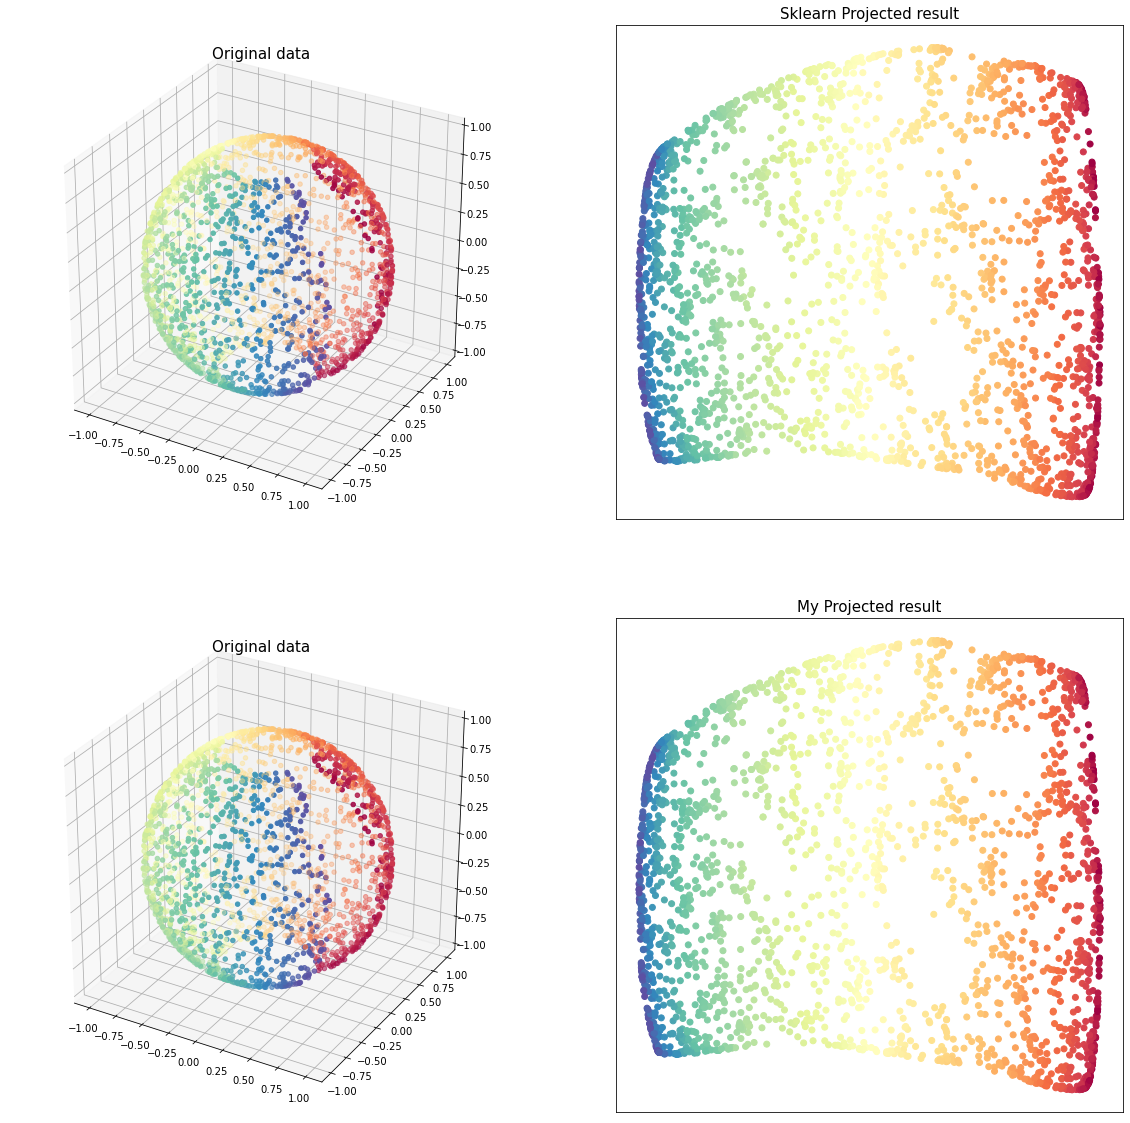

In [3]:
# ---------------------- create data ----------------------
n_samples = 3000

# Create our sphere.
np.random.seed(1024)
p = np.random.rand(n_samples) * (2 * np.pi - 0.55)
t = np.random.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
samples_color = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)
raw_samples = np.array([x, y, z]).T

#  ---------------------- sklearn LE ---------------------- 
sklearn_le = manifold.SpectralEmbedding(n_components=2, n_neighbors=20)
sklearn_le_result = sklearn_le.fit_transform(raw_samples)

# ----------------------- My LE -----------------------
my_le = MyLE(raw_samples, reduction_dims=2, n_neighbors=20)
my_le_result = my_le()

# ----------------------
# draw func
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(221, projection="3d")
ax.set_title("Original data", fontsize=15)
ax.scatter(raw_samples[:, 0], raw_samples[:, 1], raw_samples[:, 2], c=samples_color, cmap=plt.cm.Spectral)

ax = fig.add_subplot(222)
plt.xticks([])
plt.yticks([])
plt.title("Sklearn Projected result", fontsize=15)
ax.scatter(sklearn_le_result[:, 0], sklearn_le_result[:, 1], c=samples_color, cmap=plt.cm.Spectral)

ax = fig.add_subplot(223, projection="3d")
ax.set_title("Original data", fontsize=15)
ax.scatter(raw_samples[:, 0], raw_samples[:, 1], raw_samples[:, 2], c=samples_color, cmap=plt.cm.Spectral)

ax = fig.add_subplot(224)
plt.xticks([])
plt.yticks([])
plt.title("My Projected result", fontsize=15)
ax.scatter(my_le_result[:, 0], my_le_result[:, 1], c=samples_color, cmap=plt.cm.Spectral)

plt.show()